# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### The objective of this task is to develp a Machine learning model to predict prices of used cars based on the data provided. In this task, linear regression models will be developed to identify key features that influence the price of used cars. The models developed will provide insights into the patterns and relationship in the data. The insights derived from the data will eventually help estimate the prices of the used cars.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [268]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso

In [524]:
cars = pd.read_csv('data/vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [525]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [526]:
#Number of missing data in each column
cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [527]:
#percentage of missing data in each column
cars.isna().mean() * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [528]:
for i in ['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color']:
    print(cars[i].unique())

[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805' ... '2HGES15535H620534'
 '1FDWF37P64EA24868' 'SAJGX2749VCOO8376']
[nan 'rwd' '4wd' 'fwd']
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']


In [529]:
#too many unique values for VIN and model
for i in ['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color','manufacturer', 'model']:
    print(len(cars[i].unique()))

7
9
118247
4
5
14
13
43
29650


In [530]:
#From the columns missing data, how many of the rows are missing data in all of the columns with missing data
nulls = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']
df_nulls = cars[nulls]
df_nulls[df_nulls.isna().all(axis=1)].shape[0]

68

In [531]:
#From the columns missing data, how many of the rows are missing data in all of the columns with missing data
nulls = ['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color']
df_nulls = cars[nulls]
df_nulls[df_nulls.isna().all(axis=1)].shape[0]

33073

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [532]:
# Features 'condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color' has too many missing values, so decided to drop the columns.
# Features 'region', 'state' is not useful data to build a model, so they are dropped
# Features 'id', 'model' has too many unique values ,so they are dropped too
cars_df = cars.drop(columns=['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color', 'region', 'state', 'id', 'model'])

In [533]:
cars_df.isna().mean() * 100

price           0.000000
year            0.282281
manufacturer    4.133714
fuel            0.705819
odometer        1.030735
title_status    1.930753
transmission    0.598763
dtype: float64

In [534]:
#Dropped the rest of the missing rows
cars_df = cars_df.dropna()

In [535]:
cars_df.isna().mean() * 100

price           0.0
year            0.0
manufacturer    0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
dtype: float64

In [536]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394751 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         394751 non-null  int64  
 1   year          394751 non-null  float64
 2   manufacturer  394751 non-null  object 
 3   fuel          394751 non-null  object 
 4   odometer      394751 non-null  float64
 5   title_status  394751 non-null  object 
 6   transmission  394751 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.1+ MB


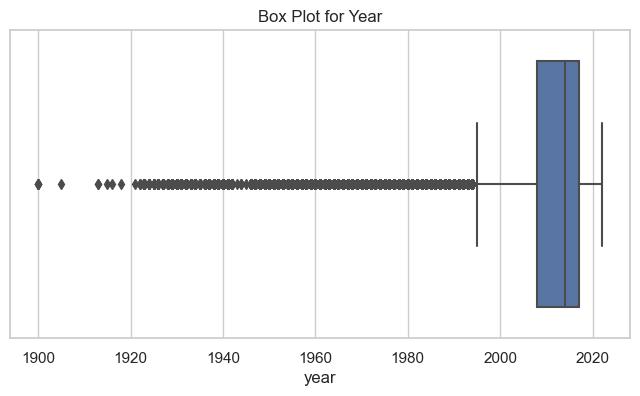

In [537]:
#Box plot to identify outliers in feature'year'
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars_df['year'])
plt.title('Box Plot for Year')
plt.show()

In [538]:
# Too many outliers in year. The data seems to have antique cars from the early last century which will skew the data ans model.So decided to drop the outliers
Q1 = cars_df['year'].quantile(0.25)
Q3 = cars_df['year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cars_df = cars_df[(cars_df['year'] >= lower_bound) & (cars_df['year'] <= upper_bound)]

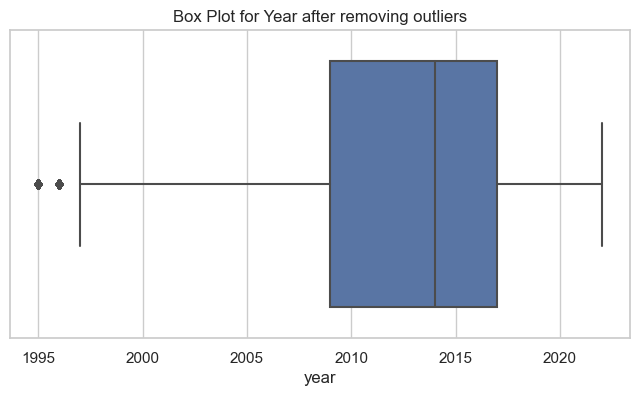

In [539]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars_df['year'])
plt.title('Box Plot for Year after removing outliers')
plt.show()

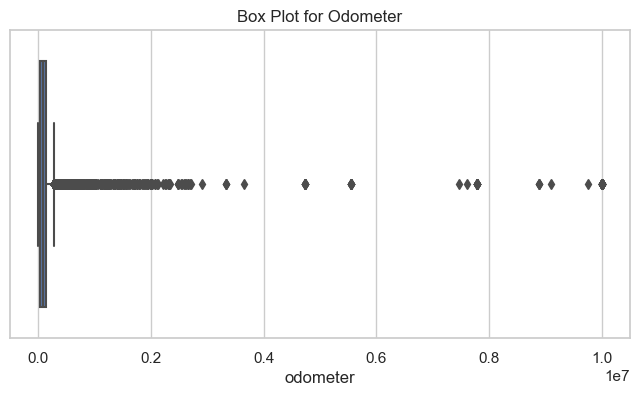

In [540]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars_df['odometer'])
plt.title('Box Plot for Odometer')
plt.show()

In [541]:
# Dropped outliers from the Odometer column
Q1 = cars_df['odometer'].quantile(0.25)
Q3 = cars_df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cars_df = cars_df[(cars_df['odometer'] >= lower_bound) & (cars_df['odometer'] <= upper_bound)]

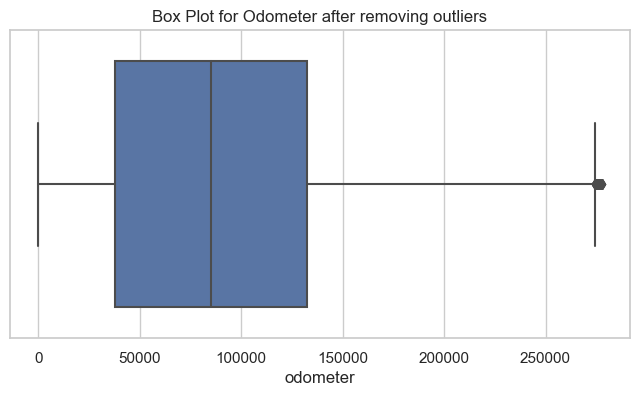

In [542]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars_df['odometer'])
plt.title('Box Plot for Odometer after removing outliers')
plt.show()

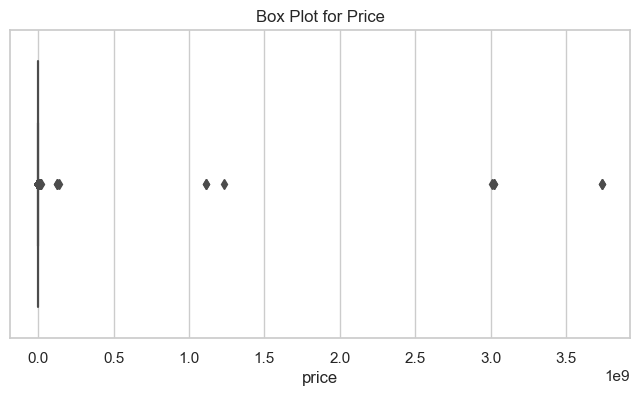

In [543]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars_df['price'])
plt.title('Box Plot for Price')
plt.show()

In [544]:
# Dropped outliers since some values are in billion which is not realistic
Q1 = cars_df['price'].quantile(0.25)
Q3 = cars_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cars_df = cars_df[(cars_df['price'] >= lower_bound) & (cars_df['price'] <= upper_bound)]

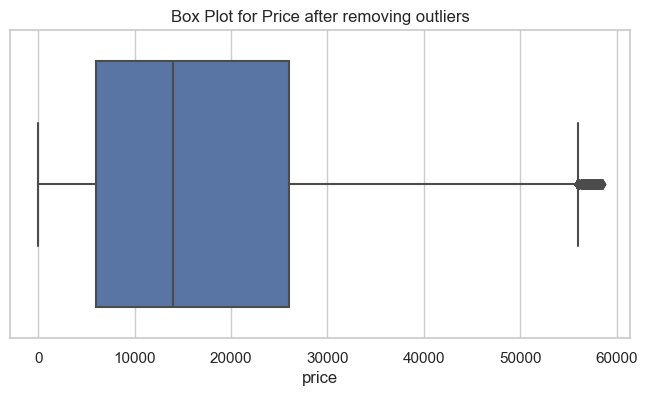

In [545]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars_df['price'])
plt.title('Box Plot for Price after removing outliers')
plt.show()

In [546]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372381 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         372381 non-null  int64  
 1   year          372381 non-null  float64
 2   manufacturer  372381 non-null  object 
 3   fuel          372381 non-null  object 
 4   odometer      372381 non-null  float64
 5   title_status  372381 non-null  object 
 6   transmission  372381 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 22.7+ MB


In [281]:
cars_df.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission
27,33590,2014.0,gmc,gas,57923.0,clean,other
28,22590,2010.0,chevrolet,gas,71229.0,clean,other
29,39590,2020.0,chevrolet,gas,19160.0,clean,other
30,30990,2017.0,toyota,gas,41124.0,clean,other
31,15000,2013.0,ford,gas,128000.0,clean,automatic


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [381]:
# Drop all features except the numerical features to build a simple regression model
cars_lin = cars_df.drop(columns=['year', 'fuel','title_status', 'transmission', 'manufacturer'])

In [382]:
cars_lin.head()

,price,odometer
27,33590,57923.0
28,22590,71229.0
29,39590,19160.0
30,30990,41124.0
31,15000,128000.0


In [383]:
#Split the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(cars_lin.drop('price', axis=1), cars_lin['price'], test_size=0.3, random_state=42)

In [384]:
linreg = LinearRegression().fit(X_train, y_train)

In [385]:
linreg.coef_

array([-0.10299652])

In [386]:
predictions = linreg.predict(X_train)
mse_train_lin = mean_squared_error(y_train, predictions)
print(mse_train_lin)

135413509.71920952


In [387]:
predictions = linreg.predict(X_test)
mse_test_lin = mean_squared_error(y_test, predictions)
print(mse_test_lin)

133718815.37258998


### Above are the results of building a simple linear regression model with the only numerical feature in the dataset, "Odometer". The co-efficient was positive which suggests that the price increases when the odometer reading increases. This does not seem right. Ideally the price decreases as the odometer reading increases.The train and test MSE was also really high. Considering the results , this model is not the right fit and we can understand that there are other factors that impacts the price

In [294]:
cars_df.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission
27,33590,2014.0,gmc,gas,57923.0,clean,other
28,22590,2010.0,chevrolet,gas,71229.0,clean,other
29,39590,2020.0,chevrolet,gas,19160.0,clean,other
30,30990,2017.0,toyota,gas,41124.0,clean,other
31,15000,2013.0,ford,gas,128000.0,clean,automatic


### Now build a linear regression model including all features and encoding the non-numerical features

In [391]:
from sklearn.metrics import mean_squared_error
X = pd.get_dummies(cars_df.drop('price', axis = 1))
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [392]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260437 entries, 130566 to 141558
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   year                          260437 non-null  float64
 1   odometer                      260437 non-null  float64
 2   manufacturer_acura            260437 non-null  bool   
 3   manufacturer_alfa-romeo       260437 non-null  bool   
 4   manufacturer_aston-martin     260437 non-null  bool   
 5   manufacturer_audi             260437 non-null  bool   
 6   manufacturer_bmw              260437 non-null  bool   
 7   manufacturer_buick            260437 non-null  bool   
 8   manufacturer_cadillac         260437 non-null  bool   
 9   manufacturer_chevrolet        260437 non-null  bool   
 10  manufacturer_chrysler         260437 non-null  bool   
 11  manufacturer_dodge            260437 non-null  bool   
 12  manufacturer_ferrari          260437 non-nul

In [393]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111616 entries, 234676 to 118569
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   year                          111616 non-null  float64
 1   odometer                      111616 non-null  float64
 2   manufacturer_acura            111616 non-null  bool   
 3   manufacturer_alfa-romeo       111616 non-null  bool   
 4   manufacturer_aston-martin     111616 non-null  bool   
 5   manufacturer_audi             111616 non-null  bool   
 6   manufacturer_bmw              111616 non-null  bool   
 7   manufacturer_buick            111616 non-null  bool   
 8   manufacturer_cadillac         111616 non-null  bool   
 9   manufacturer_chevrolet        111616 non-null  bool   
 10  manufacturer_chrysler         111616 non-null  bool   
 11  manufacturer_dodge            111616 non-null  bool   
 12  manufacturer_ferrari          111616 non-nul

In [394]:
all_features_linreg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
linreg_train_mse = mean_squared_error(all_features_linreg.predict(X_train), y_train)

print(all_features_linreg)
print(all_features_linreg.coef_)
print(linreg_mse)

LinearRegression(fit_intercept=False)
[ 8.02999033e+02 -4.44351027e-02 -5.25384661e+04 -5.21021500e+04
 -4.20457654e+04 -5.04663122e+04 -5.14826260e+04 -5.58125910e+04
 -5.13485573e+04 -5.13858439e+04 -5.72056066e+04 -5.57993926e+04
 -6.80036488e+04 -6.22033389e+04 -5.09070497e+04 -4.83369499e+04
 -5.42218571e+04 -5.56666222e+04 -5.91378282e+04 -5.21130528e+04
 -4.80207258e+04 -5.13126567e+04 -5.99639249e+04 -6.01773481e+04
 -4.94380744e+04 -5.16487483e+04 -5.74831577e+04 -5.13446494e+04
 -5.54951675e+04 -5.71309645e+04 -5.87339194e+04 -7.19410560e+04
 -5.72945223e+04 -5.49066909e+04 -4.23969277e+04 -4.70249470e+04
 -4.66810201e+04 -5.61328503e+04 -5.54478560e+04 -3.87258104e+04
 -5.14969679e+04 -5.92246867e+04 -5.20673904e+04 -4.31785471e+05
 -4.46174124e+05 -4.41393762e+05 -4.44836654e+05 -4.40677709e+05
 -3.65174127e+05 -3.62001753e+05 -3.69309003e+05 -3.71218754e+05
 -3.68085230e+05 -3.69078854e+05 -7.37770892e+05 -7.35918097e+05
 -7.31178732e+05]
154220285340801.22


In [395]:
linreg_test_mse = mean_squared_error(all_features_linreg.predict(X_test), y_test)
print(linreg_test_mse)

98259987.41239233


### Above results are from a linear regression model including non-numeric features. But both the train and test MSE is very high even in this model.Let us now build a Huber regressor model with non-numeric features

In [396]:
X = pd.get_dummies(cars_df.drop('price', axis = 1))
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [397]:
huber_all_features = HuberRegressor(fit_intercept=False).fit(X_train, y_train)
huber_train_mse = mean_squared_error(huber_all_features.predict(X_train), y_train)

print(huber_all_features)
print(huber_all_features.coef_)
print(huber_train_mse)

HuberRegressor(fit_intercept=False)
[ 1.28482174e+01 -1.13407441e-01  1.58825531e-04  3.88822322e-05
  3.78768513e-07  2.39140195e-04  4.07000516e-04  7.51615927e-05
  1.56945078e-04  7.89333849e-04  1.91312820e-06  9.49892406e-05
 -5.36154708e-07  2.31291128e-05  1.16054581e-03  3.40505265e-04
  3.16910264e-06  1.24075768e-05  1.19994889e-04  1.32455228e-04
  7.50860940e-05  3.72071451e-04  1.21215616e-04 -6.86018163e-07
  2.01689046e-04  1.02302183e-04  3.77376534e-05  2.33607745e-04
 -3.58026705e-05  5.58531256e-05  5.74037978e-05  7.52307069e-08
  1.65233756e-04 -5.44667598e-05  4.32025710e-05  4.94400900e-04
  5.79749351e-05 -3.28173750e-05  1.08934279e-04  3.48966422e-05
  3.55786403e-04  1.67185814e-04  4.56346251e-05  5.51581695e-04
  6.55207935e-05  4.58843148e-03  9.17113846e-05  1.06351465e-03
  6.16060960e-03  4.39146828e-05 -9.24791158e-06 -3.56894208e-06
  1.54084857e-04  1.49677211e-05  3.36390891e-03  1.11316996e-04
  2.88553410e-03]
137005350.2806673


In [398]:
huber_test_mse = mean_squared_error(huber_all_features.predict(X_test), y_test)
print(huber_test_mse)

135197685.44485715


### The Hube regressor too resulted in high MSE

#### Let us now try to build a Lasso regression model and estimate the relationship between variables.Had to drop the 'manufacturer' feature because it had too many unique values and model build fails becauses it need more memory. Used Ohe hot encoder to transform the catagorical variables and scaled the numerical variables.

In [470]:
X = cars_df.drop(['price','manufacturer'], axis=1)
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = ['fuel', 'title_status', 'transmission']
numerical_cols = ['year', 'odometer']
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

#Pipeline to build the linre regression model with the preprocessor and transformers
lasso_pipe = Pipeline([
                                ('preprocessor', preprocessor),
                                ('lasso', Lasso()),
                                   ])

In [471]:
lasso_pipe.fit(X_train, y_train)
lasso_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))

In [472]:
print(lasso_train_mse)
print(lasso_train_mse)

110310338.07147613
110310338.07147613


In [473]:
# Used grid search to find the best hyperparameter
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(lasso_pipe, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['fuel',
                                                                          'title_status',
                                                                          'transmission'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [474]:
best_lasso_model = grid_search.best_estimator_
print(best_lasso_model)
# Evaluate the best model on the test set
y_pred = best_lasso_model.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['fuel', 'title_status',
                                                   'transmission'])])),
                ('lasso', Lasso(alpha=0.001))])


In [475]:
best_lasso_model = grid_search.best_estimator_
lasso_train_preds = best_lasso_model.predict(X_train)
lasso_test_preds = best_lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, y_pred)

In [476]:
best_alpha = grid_search.best_params_['lasso__alpha']
print(f'Best Alpha: {best_alpha}')
print(f'Lasso Train MSE: {lasso_train_mse}')
print(f'Lasst Test MSE: {lasso_test_mse}')

Best Alpha: 0.001
Lasso Train MSE: 110303652.52078378
Lasst Test MSE: 111029452.4952541


In [477]:
lasso_model = best_lasso_model.named_steps['lasso']
non_zero_coefs = lasso_model.coef_
non_zero_coefs


array([  4224.90384814,  -2697.47416937, -12150.46264617, -12417.38379563,
       -15116.75421731, -11111.01981986,   3592.90457448,  -5214.08757935,
        -6426.66033149,  -3606.71473925,  -4433.25291044,    778.26327662,
         6556.43642358])

In [407]:
grid_search.best_estimator_.named_steps['preprocessor'].transformers_

[('num', StandardScaler(), ['year', 'odometer']),
 ('cat',
  OneHotEncoder(drop='first', sparse_output=False),
  ['fuel', 'title_status', 'transmission'])]

In [478]:
selected_features = (numerical_cols +
                 list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)))
print("Selected Features from Lasso: ")
print(selected_features)



Selected Features from Lasso: 
['year', 'odometer', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'title_status_lien', 'title_status_missing', 'title_status_parts only', 'title_status_rebuilt', 'title_status_salvage', 'transmission_manual', 'transmission_other']


In [480]:
lasso_features = pd.DataFrame({"SelectedFeatures": selected_features, 'Co-eff': non_zero_coefs})
lasso_features

,SelectedFeatures,Co-eff
0,year,4224.903848
1,odometer,-2697.474169
2,fuel_electric,-12150.462646
3,fuel_gas,-12417.383796
4,fuel_hybrid,-15116.754217
5,fuel_other,-11111.019820
6,title_status_lien,3592.904574
7,title_status_missing,-5214.087579
8,title_status_parts only,-6426.660331
9,title_status_rebuilt,-3606.714739


#### Lasso model above suggests latest model cars,car titles with lien and cars with manual transmission are expensive.Cars with higher odometer reading ,Cars with all fuel types, cars with missing titles,cars that are salvaged,rebuilt and missing parts are inexpensive. The best hyperparameter was 0.001 but the MSE was on higher side. Hence decided to build a ridge regression model

In [547]:
# Split the data into train and test
X = cars_df.drop('price', axis = 1)
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
categorical_cols = ['fuel', 'title_status', 'transmission', 'manufacturer']
numerical_cols = ['year', 'odometer']

In [548]:
# Transform the variables. Standardize the target variable using log, the numeric feature using scalar and catagorical variables using One Hot Encoder
y_log = np.log1p(y)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')

In [549]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

ridge_model = TransformedTargetRegressor(
    regressor=Ridge(),
    transformer=StandardScaler()
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge_model', ridge_model)
])

In [550]:
# setup hyperparameter grid for grid search and perform cross validation
param_grid = {
    'ridge_model__regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

C:\Users\m_shanmugavel\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

C:\Users\m_shanmugavel\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

C:\Users\m_shanmugavel\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

C:\Users\m_shanmugavel\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

C:\Users\m_shanmugavel\AppData\Local\anaconda3\Lib\site-packages\sklearn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'manufacturer'])])),
                                       ('ridge_model',
                                        TransformedTargetRegressor(regressor=Ridge(),
                                                                   transformer=StandardScaler()))]),
             param_grid={'ridge_model__regressor__alpha': [0.001, 0.01, 0.1,
                                                           1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [551]:
# Get the best model from the grid search
best_ridge_model = grid_search.best_estimator_
preprocessor.fit(X)
y_pred = best_ridge_model.predict(X)

In [552]:
# Evaluate the best model on the test set
y_pred = best_ridge_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {test_mse}')

Test MSE: 99920405.71824543


In [425]:
# Interpret the best model using permutation_importance
print("\nPermutation Importance:")
perm_importance = permutation_importance(best_ridge_model.named_steps['ridge_model'].regressor_, preprocessor.transform(X), y_log, n_repeats=30, random_state=22)
feature_importance = pd.DataFrame({
    'Feature': preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols).tolist() +
               preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist(),
    'Importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)



Permutation Importance:
                         Feature  Importance
12            transmission_other    0.017410
5                     fuel_other    0.009603
3                       fuel_gas    0.008904
0                           year    0.004348
4                    fuel_hybrid    0.002422
32              manufacturer_kia    0.002055
28          manufacturer_hyundai    0.001642
42           manufacturer_nissan    0.001432
21            manufacturer_dodge    0.001125
2                  fuel_electric    0.000992
25              manufacturer_gmc    0.000625
34            manufacturer_lexus    0.000596
49            manufacturer_tesla    0.000503
51       manufacturer_volkswagen    0.000480
44          manufacturer_porsche    0.000464
11           transmission_manual    0.000462
36            manufacturer_mazda    0.000294
46            manufacturer_rover    0.000260
30           manufacturer_jaguar    0.000247
15             manufacturer_audi    0.000242
50           manufacturer_toyo

In [553]:
ridge_train_preds = grid_search.predict(X_train)
ridge_test_preds = grid_search.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

In [554]:
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')

Train MSE: 99526937.03713724
Test MSE: 99920405.71824543


#### Ridge regression model also resulted in high MSE. So let us try to reduce dimensioanlity using PCA and then try to build a ridge regression model

In [212]:
cars_df.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission
27,-0.003608,0.282713,gmc,gas,-0.193014,clean,other
28,-0.004477,-0.161068,chevrolet,gas,-0.127245,clean,other
29,-0.003134,0.948386,chevrolet,gas,-0.384613,clean,other
30,-0.003813,0.615550,toyota,gas,-0.276049,clean,other
31,-0.005076,0.171768,ford,gas,0.153364,clean,automatic


In [504]:
categorical_columns = ['fuel', 'title_status', 'transmission', 'manufacturer']
cars_df_ohe = pd.get_dummies(cars_df[categorical_columns])
numerical_columns = ['price', 'year', 'odometer']
scaler = StandardScaler()
cars_df[numerical_columns] = scaler.fit_transform(cars_df[numerical_columns])
car_test = cars_df.drop(columns=['fuel', 'title_status', 'transmission', 'manufacturer'])
cars_encoded = pd.concat([car_test, cars_df_ohe], axis=1)
feature_names = list(cars_encoded.drop('price', axis=1).columns)
# Apply PCA. Setting to 25 since we have 50+ feature after one hot encoding catagorical features
n_components = 25  
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(cars_encoded.drop('price', axis=1))  

# Create a DataFrame with the PCA
pca_columns = [feature_names[i] for i in range(n_components)]
df_pca = pd.DataFrame(data=pca_result, columns=pca_columns)

# Concatenate the PCA with price
df_final = pd.concat([cars_df['price'], df_pca], axis=1)
print(df_final.head())

       price      year  odometer  fuel_diesel  fuel_electric  fuel_gas  \
27  1.273031  1.116913  0.977942     0.073711       1.525284  0.087116   
28  0.440850 -1.276950  0.533057     0.534531      -0.524181 -0.367004   
29  1.726949 -1.507318  0.674948     0.441654       0.200339 -0.952357   
30  1.076334 -1.227591  0.697482     1.263460       0.259744  0.356117   
31 -0.133356  0.187543 -0.036365    -0.295186      -0.145100  0.018257   

    fuel_hybrid  fuel_other  title_status_clean  title_status_lien  ...  \
27     0.090245   -0.073412            0.445986          -0.258412  ...   
28    -0.016595   -0.183295            0.018643          -0.107924  ...   
29     0.409912    0.137197            0.001237          -0.247047  ...   
30    -0.237186   -0.081044           -0.477233          -0.055005  ...   
31    -0.200364   -0.266583           -0.216814           0.205000  ...   

    transmission_other  manufacturer_acura  manufacturer_alfa-romeo  \
27            0.155425           

In [505]:
df_final = df_final.dropna()

In [506]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('price', axis=1), df_final['price'], test_size=0.2, random_state=42)

In [508]:
# Fit a simple linear regression model after PCA
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9779904082474037


In [437]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259924 entries, 141658 to 141558
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       259924 non-null  float64
 1   odometer                   259924 non-null  float64
 2   fuel_diesel                259924 non-null  float64
 3   fuel_electric              259924 non-null  float64
 4   fuel_gas                   259924 non-null  float64
 5   fuel_hybrid                259924 non-null  float64
 6   fuel_other                 259924 non-null  float64
 7   title_status_clean         259924 non-null  float64
 8   title_status_lien          259924 non-null  float64
 9   title_status_missing       259924 non-null  float64
 10  title_status_parts only    259924 non-null  float64
 11  title_status_rebuilt       259924 non-null  float64
 12  title_status_salvage       259924 non-null  float64
 13  transmission_automatic     25

In [509]:
X = df_final.drop('price', axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include='float').columns.tolist()
numeric_transformer = StandardScaler()

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols)
    ]
)

ridge_model = TransformedTargetRegressor(
    regressor=Ridge(),
    transformer=StandardScaler()
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge_model', ridge_model)
])


param_grid = {
    'ridge_model__regressor__alpha': [0.01, 0.1, 1.0, 10.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Get the best model from the grid search
best_ridge_model = grid_search.best_estimator_

preprocessor.fit(X)

# Evaluate the best model on the test set
y_pred = best_ridge_model.predict(X)


In [510]:
# Interpret the best model using permutation_importance
print("\nPermutation Importance:")
perm_importance = permutation_importance(best_ridge_model.named_steps['ridge_model'].regressor_, preprocessor.transform(X), y, n_repeats=30, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols).tolist(),
    'Importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


Permutation Importance:
                      Feature    Importance
18  manufacturer_aston-martin  5.421273e-05
7          title_status_clean  4.712334e-05
3               fuel_electric  4.191637e-05
1                    odometer  3.267126e-05
5                 fuel_hybrid  3.120702e-05
2                 fuel_diesel  3.072549e-05
21         manufacturer_buick  2.740555e-05
14        transmission_manual  2.632498e-05
9        title_status_missing  2.351808e-05
16         manufacturer_acura  1.891574e-05
8           title_status_lien  1.235780e-05
0                        year  1.226144e-05
17    manufacturer_alfa-romeo  9.086674e-06
24      manufacturer_chrysler  8.542776e-06
4                    fuel_gas  7.528697e-06
22      manufacturer_cadillac  4.375916e-06
15         transmission_other  1.528120e-06
6                  fuel_other  1.006523e-06
12       title_status_salvage  6.909504e-07
20           manufacturer_bmw  4.852248e-07
13     transmission_automatic  2.676866e-07
19     

In [511]:
# Get the coefficients from the best Ridge model
coefficients = best_ridge_model.named_steps['ridge_model'].regressor_.coef_

# Create a dataframe for coefficients
coefficients_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Coefficient': coefficients
})

# Merge coefficients and permutation importances dataframes
merged_df = pd.merge(coefficients_df, feature_importance, on='Feature')

merged_df.sort_values(by='Importance', ascending=False)

,Feature,Coefficient,Importance
18,manufacturer_aston-martin,-0.005059,5.421273e-05
7,title_status_clean,-0.005017,4.712334e-05
3,fuel_electric,-0.004551,4.191637e-05
1,odometer,0.003968,3.267126e-05
5,fuel_hybrid,0.003928,3.120702e-05
2,fuel_diesel,-0.003597,3.072549e-05
21,manufacturer_buick,-0.003574,2.740555e-05
14,transmission_manual,0.003419,2.632498e-05
9,title_status_missing,-0.003572,2.351808e-05
16,manufacturer_acura,0.003076,1.891574e-05


In [513]:
ridge_pca_train_preds = grid_search.predict(X_train)
ridge_pca_test_preds = grid_search.predict(X_test)
ridge_pca_train_mse = mean_squared_error(y_train, ridge_pca_train_preds)
ridge_pca_test_mse = mean_squared_error(y_test, ridge_pca_test_preds)

In [515]:
print(f'Train MSE: {ridge_pca_train_mse}')
print(f'Test MSE: {ridge_pca_test_mse}')

Train MSE: 0.9799147201154631
Test MSE: 0.9777584942436183


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [555]:
models = ['Simple Regression', 'Regression with all Features', 'Huber Regression', 'Lasso', 'Ridge', 'Ridge with PCA']
train_mse = [mse_train_lin, linreg_train_mse, huber_train_mse, lasso_train_mse, ridge_train_mse, ridge_pca_train_mse] 
test_mse = [mse_test_lin, linreg_test_mse, huber_test_mse,  lasso_test_mse,  ridge_test_mse, ridge_pca_test_mse]     
pd.DataFrame({"Models": models, 'Training MSE': train_mse, 'Test MSE': test_mse})

,Models,Training MSE,Test MSE
0,Simple Regression,1.354135e+08,1.337188e+08
1,Regression with all Features,9.921410e+07,9.825999e+07
2,Huber Regression,1.370054e+08,1.351977e+08
3,Lasso,1.103037e+08,1.110295e+08
4,Ridge,9.952694e+07,9.992041e+07
5,Ridge with PCA,9.799147e-01,9.777585e-01


#### Based on the different models we developed , the ridge regression model after performing dimensionality reduction gave the best results. The MSE for training data and test data were almost the same.

#### The Lasso model suggested latest model cars,car titles with lien and cars with manual transmission are expensive.Cars with higher odometer reading ,Cars with all fuel types, cars with missing titles,cars that are salvaged,rebuilt and missing parts are inexpensive. The best hyperparameter was 0.001 but the MSE was on higher side. Hence decided to build a ridge regression model

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Based on our best performing model

##### Used electric cars and diesel fueled cars are cheaper compared to other fuel types
##### Used Aston-Martin, Buick, Chrysler,Audi are are cheaper 
##### Cars with clean titles, rebuilt cars are cheaper 
##### I recommend the client to add more inventory of latest Hybrid and manual transmission cars
